### Impact of covid-19 on housing market

### Abstract

In this project, I plan to analyze the impact of covid on the housing market. One specific area that specifically experienced the brunt of this unprecedented crisis is the housing market. As a home buyer during the pandemic, my husband and I were going through the process of searching for a home. But the housing market at the start of 2021 gave us immense anxiety and worry as the demand for the houses was very high, prices of the houses kept escalating at a very fast rate, the inventory of houses kept declining and the bidding war to top it off made things worse. We spent countless hours every day trying to read the news, watching youtube videos, and talking to other buyers to understand the housing market to help with the confusion. 

A lot of the home-buyers across the country are frustrated with this increasing trend in housing prices. This topic is particularly human-centered as it affects a vast majority of Americans who are looking to purchase homes. If the prices keep increasing at this rate, a lot of the people from lower-income brackets will suffer as they will not be able to afford to house, or will be pushed to outskirts or suburbs thus causing a widening of the wealth gap between the rich and the poor. Because homeownership is an important tool for building long-term wealth and children of homeowners are likely to become homeowners, this trend can further exacerbate wealth inequality for future generations. 

By performing this analysis I hope to learn if there was any correlation between the number of covid cases and housing prices and hope to see how the market fluctuated during the pandemic. I also want to see if the housing prices have gone down recently or if they are still on the increasing trend. This analysis is of particular scientific interest as it will help others see trends between housing prices and a fluctuating economy during a pandemic. 

### Research Question and Analysis

As the pandemic progressed, the cases started increasing nationwide. The state and national government issued several lockdowns to control the spread of the virus, a lot of the businesses were shut and there was widespread fear of another recession. Tracking changes in the housing market will provide us insights into the economy of North Carolina state, help us contextualize growth and decline in this county, and give us insight into the market. As part of this project, I plan to explore the following questions to help understand the trend in the housing market since the start of the pandemic. 

1. During the COVID-19 pandemic did the housing prices go up or down from January  2020 through August 2021?
2. Did the number of COVID-19 cases and deaths have an impact on the housing prices from January 2020 through August 2021?
3. Where there any other trends in the data related to covid cases and the housing market?

### Data Source

To perform the analysis I will use the following different datasets. 

1. The RAW_us_confirmed_cases.csv file from the Kaggle repository of John Hopkins University COVID-19 data - https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university?select=RAW_us_confirmed_cases.csv
2. The weekly housing market data from Redfin - https://redfin-public-data.s3-us-west-2.amazonaws.com/redfin_covid19/weekly_housing_market_data_most_recent.tsv

The Redfin weekly housing market data has data for each county on a weekly basis. The data is broken down by property type (All Residential, Single Family, Condo, Multi-Family, Townhouse, etc).  Redfin has published this page to define each column in the dataset and how to interpret the column. This data set is licensed under Redfin’s Terms of Use. The guidelines for using the data states to cite the data source appropriately and provide a link to Redfin. 

### STEP 1: Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import math
import os
import warnings
import matplotlib.pyplot as plt  
import datetime as dt
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')

In [2]:
COUNTY_NAME = 'Mecklenburg'
STATE_NAME = 'North Carolina'
STATE_NAME_SHORT = 'NC'
COUNTY_FIPS_CODE = 37119
COUNTY_POPULATION = 1115482

In [3]:
RAW_PATH = '../data-raw'
PROCESSED_PATH = '../data-processed'
START_DATE_ANALYSIS = '2020-02-03'
END_DATE_ANALYSIS = '2021-10-15'

### Read Raw Data

In [4]:
covid_confirmed_cases = pd.read_csv(os.path.join(RAW_PATH, 'CONVENIENT_us_confirmed_cases.csv'), header=[0,1])
covid_confirmed_cases.head()

Province_State Alabama                                                     \
          Admin2 Autauga Baldwin Barbour Bibb Blount Bullock Butler Calhoun   
0        1/23/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
1        1/24/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
2        1/25/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
3        1/26/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
4        1/27/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   

            ... Wyoming                                                  \
  Chambers  ...    Park Platte Sheridan Sublette Sweetwater Teton Uinta   
0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
1      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
2      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
3      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
4      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   

                              
  Unassigned Washakie Weston  
0        0.0      0.0    0.0  
1        0.0      0.0    0.0  
2        0.0      0.0    0.0  
3        0.0      0.0    0.0  
4        0.0      0.0    0.0  

[5 rows x 3343 columns]

In [5]:
covid_confirmed_deaths = pd.read_csv(os.path.join(RAW_PATH, 'CONVENIENT_us_deaths.csv'), header=[0,1])
covid_confirmed_deaths.head()

Province_State Alabama                                                     \
          Admin2 Autauga Baldwin Barbour Bibb Blount Bullock Butler Calhoun   
0        1/23/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
1        1/24/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
2        1/25/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
3        1/26/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
4        1/27/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   

            ... Wyoming                                                  \
  Chambers  ...    Park Platte Sheridan Sublette Sweetwater Teton Uinta   
0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
1      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
2      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
3      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
4      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   

                              
  Unassigned Washakie Weston  
0        0.0      0.0    0.0  
1        0.0      0.0    0.0  
2        0.0      0.0    0.0  
3        0.0      0.0    0.0  
4        0.0      0.0    0.0  

[5 rows x 3343 columns]

In [6]:
raw = pd.read_csv(os.path.join(RAW_PATH,'weekly_housing_market_data_most_recent.tsv'), sep='\t')
raw.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,2982,5,"Isle of Wight County, VA",county,2019-04-22,2019-04-28,1 weeks,15.0,-0.210526,15.0,...,NaN,15.0,NaN,22.0,NaN,14.0,NaN,-0.210526,0.375,0.555556
1,27160,-2,"Jackson, OH metro area",metro,2020-07-20,2020-07-26,1 weeks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1462,5,"Jackson County, MN",county,2021-05-10,2021-05-16,1 weeks,1.0,-0.500000,1.0,...,NaN,1.0,NaN,NaN,NaN,2.0,NaN,-0.500000,NaN,0.000000
3,35580,-2,"New Ulm, MN metro area",metro,2020-08-03,2020-08-09,1 weeks,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-0.500,NaN
4,607,5,"Morgan County, GA",county,2020-08-17,2020-08-23,1 weeks,3.0,0.500000,3.0,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,0.500000,0.000,NaN


### STEP 2 : Data Processing and Cleaning

Here I will perform data processing to filter data for Mecklenburg county and North Carolina state. I will filer data for dates from January 2020 to October 2021.

In [7]:
# Extract confirmed cases for NC State
confirmed_cases_nc = pd.DataFrame((covid_confirmed_cases['Province_State']['Admin2']).copy())
confirmed_cases_nc['Cases'] = (covid_confirmed_cases[STATE_NAME][COUNTY_NAME]).copy()

#rename column admin2 to Date
confirmed_cases_nc.rename(columns={"Admin2": "Date"},inplace=True)

# Parse the date col to date type
confirmed_cases_nc['Date'] = pd.to_datetime(confirmed_cases_nc['Date'])

confirmed_cases_nc = confirmed_cases_nc[(confirmed_cases_nc['Date'] >= START_DATE_ANALYSIS) & (confirmed_cases_nc['Date'] <= END_DATE_ANALYSIS)]
confirmed_cases_nc['Moving Average Cases'] = confirmed_cases_nc.rolling(window=7).mean().round()
confirmed_cases_nc['Cumulative Cases'] = confirmed_cases_nc['Cases'].cumsum()

confirmed_cases_nc.head()



,Date,Cases,Moving Average Cases,Cumulative Cases
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0
14,2020-02-06,0.0,NaN,0.0
15,2020-02-07,0.0,NaN,0.0


In [8]:
confirmed_cases_weekly = confirmed_cases_nc.resample('W', on='Date').sum().reset_index()
confirmed_cases_weekly.rename(columns={"Date": "period_end"},inplace=True)

confirmed_cases_weekly['period_begin'] = confirmed_cases_weekly['period_end']-pd.DateOffset(days=6)

confirmed_cases_weekly = confirmed_cases_weekly[['period_begin', 'period_end', 'Cases', 'Moving Average Cases', 'Cumulative Cases']]
confirmed_cases_weekly


,period_begin,period_end,Cases,Moving Average Cases,Cumulative Cases
0,2020-02-03,2020-02-09,0.0,0.0,0.0
1,2020-02-10,2020-02-16,0.0,0.0,0.0
2,2020-02-17,2020-02-23,0.0,0.0,0.0
3,2020-02-24,2020-03-01,0.0,0.0,0.0
4,2020-03-02,2020-03-08,0.0,0.0,0.0
...,...,...,...,...,...
84,2021-09-13,2021-09-19,4049.0,4066.0,1008113.0
85,2021-09-20,2021-09-26,3433.0,3472.0,1032423.0
86,2021-09-27,2021-10-03,2617.0,2841.0,1052306.0
87,2021-10-04,2021-10-10,2238.0,2281.0,1068274.0


In [9]:
# Extract death cases for NC State
confirmed_death_nc = pd.DataFrame((covid_confirmed_deaths['Province_State']['Admin2']).copy())
confirmed_death_nc['Deaths'] = (covid_confirmed_deaths[STATE_NAME][COUNTY_NAME]).copy()

#rename column admin2 to Date
confirmed_death_nc.rename(columns={"Admin2": "Date"},inplace=True)

# Parse the date col to date type
confirmed_death_nc['Date'] = pd.to_datetime(confirmed_cases_nc['Date'])

confirmed_death_nc = confirmed_death_nc[(confirmed_death_nc['Date'] >= START_DATE_ANALYSIS) & (confirmed_death_nc['Date'] <= END_DATE_ANALYSIS)]
confirmed_death_nc['Moving Average Deaths'] = confirmed_death_nc.rolling(window=7).mean().round()
confirmed_death_nc['Cumulative Deaths'] = confirmed_death_nc['Deaths'].cumsum()


confirmed_death_nc.head()

,Date,Deaths,Moving Average Deaths,Cumulative Deaths
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0
14,2020-02-06,0.0,NaN,0.0
15,2020-02-07,0.0,NaN,0.0


In [10]:
confirmed_deaths_weekly = confirmed_death_nc.resample('W', on='Date').sum().reset_index()
confirmed_deaths_weekly.rename(columns={"Date": "period_end"},inplace=True)

confirmed_deaths_weekly['period_begin'] = confirmed_deaths_weekly['period_end']-pd.DateOffset(days=6)

confirmed_deaths_weekly = confirmed_deaths_weekly[['period_begin', 'period_end', 'Deaths', 'Moving Average Deaths', 'Cumulative Deaths']]
confirmed_deaths_weekly

,period_begin,period_end,Deaths,Moving Average Deaths,Cumulative Deaths
0,2020-02-03,2020-02-09,0.0,0.0,0.0
1,2020-02-10,2020-02-16,0.0,0.0,0.0
2,2020-02-17,2020-02-23,0.0,0.0,0.0
3,2020-02-24,2020-03-01,0.0,0.0,0.0
4,2020-03-02,2020-03-08,0.0,0.0,0.0
...,...,...,...,...,...
84,2021-09-13,2021-09-19,34.0,34.0,7745.0
85,2021-09-20,2021-09-26,26.0,28.0,7939.0
86,2021-09-27,2021-10-03,23.0,25.0,8118.0
87,2021-10-04,2021-10-10,22.0,19.0,8256.0


### Housing Data

In [11]:
#only selecting meclenburg county North Carolina
redfin_housing = raw[raw["region_name"].str.contains('Mecklenburg County, NC')]

redfin_housing['period_begin'] = pd.to_datetime(redfin_housing['period_begin'])
redfin_housing['period_end'] = pd.to_datetime(redfin_housing['period_end'])

# only restricting to required time frame.
redfin_housing = redfin_housing[(redfin_housing["period_begin"]>=START_DATE_ANALYSIS) & (redfin_housing["period_end"]<=END_DATE_ANALYSIS)]
redfin_housing = redfin_housing.sort_values(["period_begin", "period_end"], ascending = (True, True))

# looking for duration of 1 week.
redfin_housing = redfin_housing[redfin_housing['duration'] == '1 weeks']

#keeping columns of interest
redfin_housing = redfin_housing[['period_begin','period_end','inventory','total_homes_sold', 'median_sale_price','median_new_listing_price', 'total_new_listings']]
redfin_housing
 

,period_begin,period_end,inventory,total_homes_sold,median_sale_price,median_new_listing_price,total_new_listings
273464,2020-02-03,2020-02-09,4022.0,251.0,265000.0,299900.0,403.0
273548,2020-02-10,2020-02-16,4041.0,346.0,279497.5,315000.0,428.0
273753,2020-02-17,2020-02-23,4070.0,286.0,283000.0,299000.0,413.0
519422,2020-02-24,2020-03-01,4007.0,522.0,271750.0,314900.0,426.0
458166,2020-03-02,2020-03-08,4132.0,360.0,286500.0,317850.0,548.0
...,...,...,...,...,...,...,...
457867,2021-09-06,2021-09-12,2614.0,360.0,365250.0,360000.0,398.0
17905,2021-09-13,2021-09-19,2595.0,451.0,371000.0,363230.0,388.0
6571,2021-09-20,2021-09-26,2574.0,417.0,335000.0,374950.0,308.0
110304,2021-09-27,2021-10-03,2492.0,575.0,360000.0,385000.0,314.0


### STEP 3 : Data Analysis

In [12]:
nc_cases_merged = pd.merge(confirmed_cases_weekly, confirmed_deaths_weekly, how='outer', on=['period_begin', 'period_end'])

#inital population of the county
nc_cases_merged['Initial Population'] = COUNTY_POPULATION
#population at risk = population - cases - deaths
nc_cases_merged['Population at Risk'] = nc_cases_merged['Initial Population'] - nc_cases_merged['Cumulative Cases'] - nc_cases_merged['Cumulative Deaths']
#rate of infection = moving average case/population at risk
nc_cases_merged['Rate of Infection'] = (nc_cases_merged['Moving Average Cases']/nc_cases_merged['Population at Risk']) * 100
#rate of daily infection 
nc_cases_merged['Rate of Weekly Infection'] = (nc_cases_merged['Cases']/nc_cases_merged['Population at Risk']) * 100
#rate of cases
nc_cases_merged['Rate of Cases'] = (nc_cases_merged['Moving Average Cases'].diff()/COUNTY_POPULATION) * 100
#rate of daily cases
nc_cases_merged['Rate of Weekly Cases'] = (nc_cases_merged['Cases'].diff()/COUNTY_POPULATION) * 100
nc_cases_merged.tail()

,period_begin,period_end,Cases,Moving Average Cases,Cumulative Cases,Deaths,Moving Average Deaths,Cumulative Deaths,Initial Population,Population at Risk,Rate of Infection,Rate of Weekly Infection,Rate of Cases,Rate of Weekly Cases
84,2021-09-13,2021-09-19,4049.0,4066.0,1008113.0,34.0,34.0,7745.0,1115482,99624.0,4.081346,4.064282,0.085882,0.085524
85,2021-09-20,2021-09-26,3433.0,3472.0,1032423.0,26.0,28.0,7939.0,1115482,75120.0,4.621938,4.570021,-0.053251,-0.055223
86,2021-09-27,2021-10-03,2617.0,2841.0,1052306.0,23.0,25.0,8118.0,1115482,55058.0,5.160013,4.753169,-0.056567,-0.073152
87,2021-10-04,2021-10-10,2238.0,2281.0,1068274.0,22.0,19.0,8256.0,1115482,38952.0,5.855925,5.745533,-0.050203,-0.033976
88,2021-10-11,2021-10-17,1635.0,1284.0,771095.0,23.0,18.0,6004.0,1115482,338383.0,0.379452,0.483180,-0.089378,-0.054057


### Merge housing and covid data

In [13]:
nc_housing_covid = pd.merge(nc_cases_merged, redfin_housing, how='outer', on=['period_begin', 'period_end'])
nc_housing_covid

,period_begin,period_end,Cases,Moving Average Cases,Cumulative Cases,Deaths,Moving Average Deaths,Cumulative Deaths,Initial Population,Population at Risk,Rate of Infection,Rate of Weekly Infection,Rate of Cases,Rate of Weekly Cases,inventory,total_homes_sold,median_sale_price,median_new_listing_price,total_new_listings
0,2020-02-03,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,1115482,1115482.0,0.000000,0.000000,NaN,NaN,4022.0,251.0,265000.0,299900.0,403.0
1,2020-02-10,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,1115482,1115482.0,0.000000,0.000000,0.000000,0.000000,4041.0,346.0,279497.5,315000.0,428.0
2,2020-02-17,2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,1115482,1115482.0,0.000000,0.000000,0.000000,0.000000,4070.0,286.0,283000.0,299000.0,413.0
3,2020-02-24,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,1115482,1115482.0,0.000000,0.000000,0.000000,0.000000,4007.0,522.0,271750.0,314900.0,426.0
4,2020-03-02,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,1115482,1115482.0,0.000000,0.000000,0.000000,0.000000,4132.0,360.0,286500.0,317850.0,548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021-09-13,2021-09-19,4049.0,4066.0,1008113.0,34.0,34.0,7745.0,1115482,99624.0,4.081346,4.064282,0.085882,0.085524,2595.0,451.0,371000.0,363230.0,388.0
85,2021-09-20,2021-09-26,3433.0,3472.0,1032423.0,26.0,28.0,7939.0,1115482,75120.0,4.621938,4.570021,-0.053251,-0.055223,2574.0,417.0,335000.0,374950.0,308.0
86,2021-09-27,2021-10-03,2617.0,2841.0,1052306.0,23.0,25.0,8118.0,1115482,55058.0,5.160013,4.753169,-0.056567,-0.073152,2492.0,575.0,360000.0,385000.0,314.0
87,2021-10-04,2021-10-10,2238.0,2281.0,1068274.0,22.0,19.0,8256.0,1115482,38952.0,5.855925,5.745533,-0.050203,-0.033976,2479.0,396.0,370000.0,362130.0,270.0


### STEP 4: Visualization

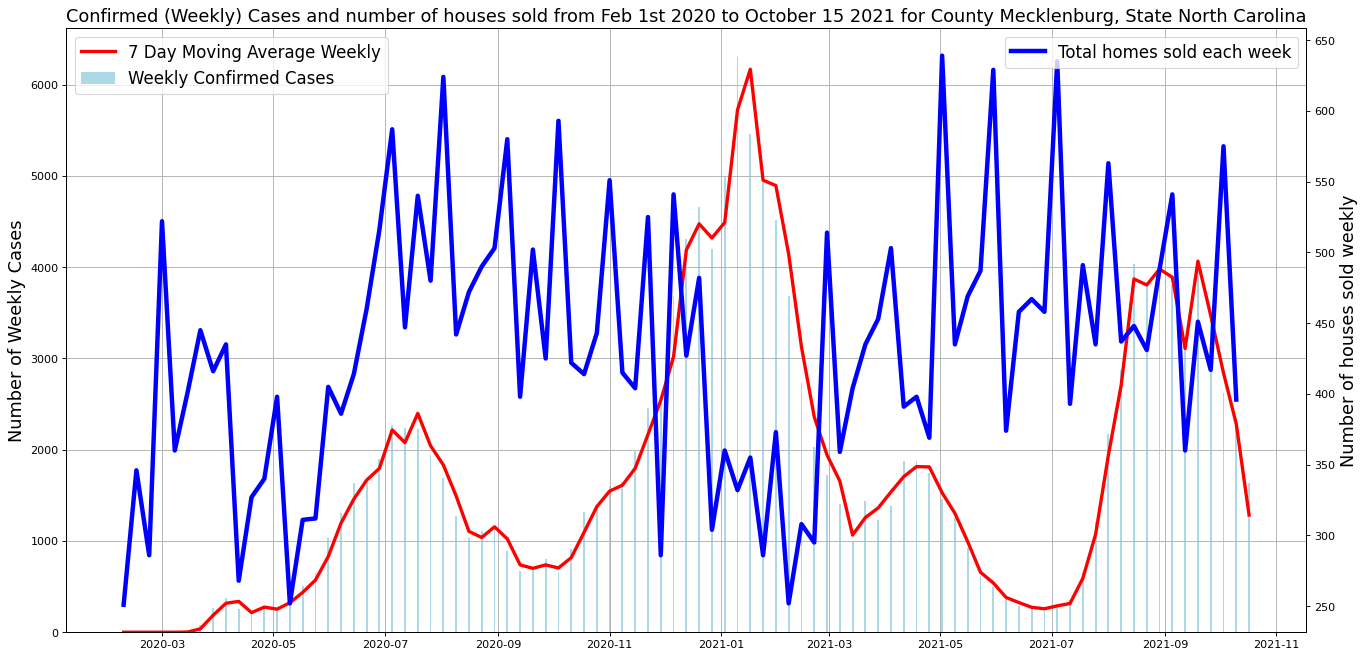

In [14]:
figure(figsize=(20, 10), dpi=80)
plt.grid(True)

ax = plt.gca()
ax2 = plt.twinx()

#Confirmed Cases
ax.bar(nc_housing_covid['period_end'], nc_housing_covid['Cases'], color='lightblue', label='Weekly Confirmed Cases', width=1)

#7 day moving average
ax.plot(nc_housing_covid['period_end'], nc_housing_covid['Moving Average Cases'], color='red', label='7 Day Moving Average Weekly', linewidth=3)

#homes sold
ax2.plot(nc_housing_covid['period_end'], nc_housing_covid['total_homes_sold'], color='blue', label='Total homes sold each week', linewidth=4)

plt.xlabel('Date', fontsize=16)
plt.title('Confirmed (Weekly) Cases and number of houses sold from Feb 1st 2020 to October 15 2021 for County Mecklenburg, State North Carolina', fontsize=16)

ax.set_ylabel('Number of Weekly Cases', fontsize=16)
ax2.set_ylabel('Number of houses sold weekly', fontsize=16)

ax.legend(loc=2, fontsize=15)
ax2.legend(loc=1, fontsize=15)
plt.savefig('../results/weekly_cases_vs_houses_sold_mecklenburg_county.jpeg')

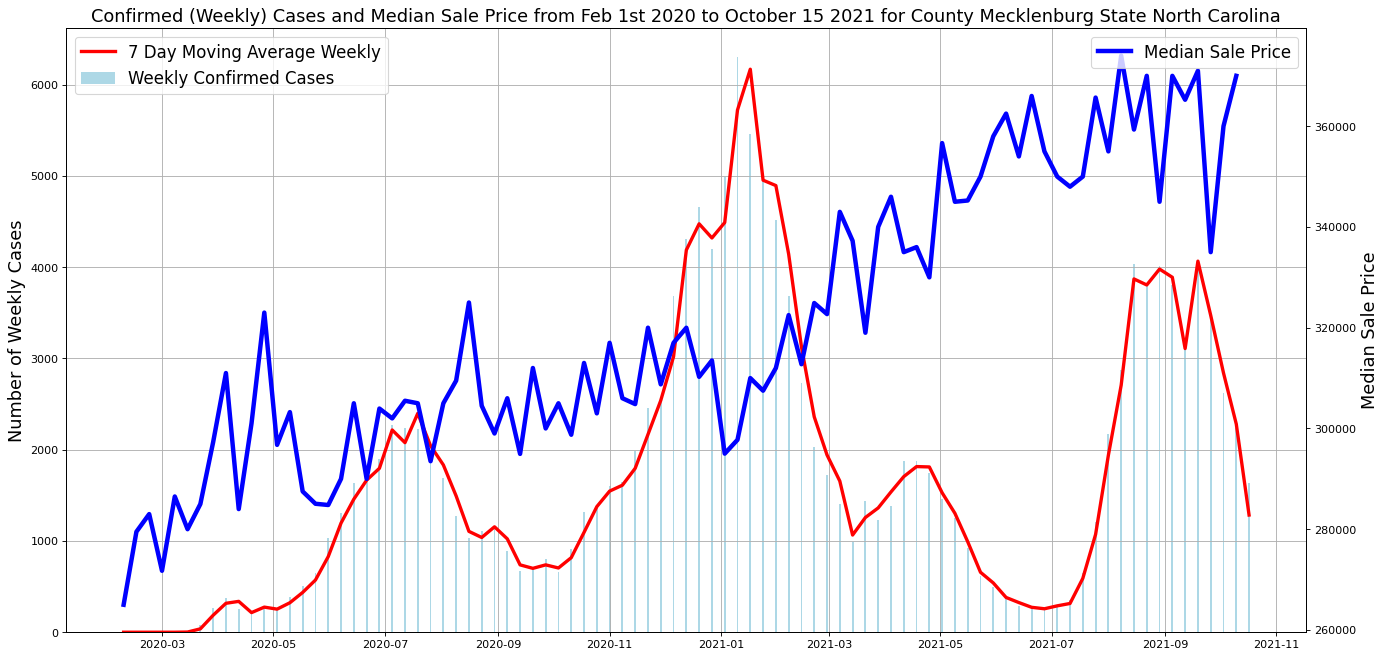

In [15]:
figure(figsize=(20, 10), dpi=80)
plt.grid(True)

ax = plt.gca()
ax2 = plt.twinx()

#Confirmed Cases
ax.bar(nc_housing_covid['period_end'], nc_housing_covid['Cases'], color='lightblue', label='Weekly Confirmed Cases', width=1)

#7 day moving average
ax.plot(nc_housing_covid['period_end'], nc_housing_covid['Moving Average Cases'], color='red', label='7 Day Moving Average Weekly', linewidth=3)

#homes sold
ax2.plot(nc_housing_covid['period_end'], nc_housing_covid['median_sale_price'], color='blue', label='Median Sale Price', linewidth=4)

plt.xlabel('Date', fontsize=16)
plt.title('Confirmed (Weekly) Cases and Median Sale Price from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)

ax.set_ylabel('Number of Weekly Cases', fontsize=16)
ax2.set_ylabel('Median Sale Price', fontsize=16)

ax.legend(loc=2, fontsize=15)
ax2.legend(loc=1, fontsize=15)
plt.savefig('../results/weekly_cases_vs_median_sale_price_mecklenburg_county.jpeg')

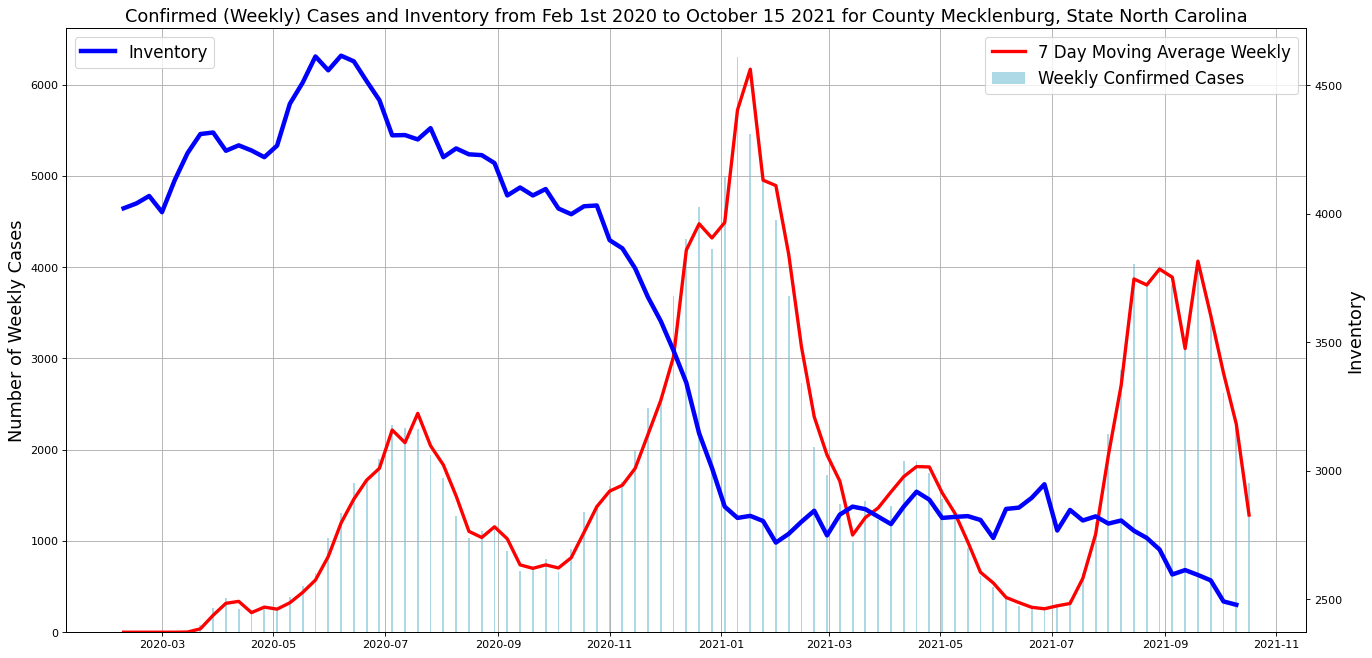

In [16]:
figure(figsize=(20, 10), dpi=80)
plt.grid(True)

ax = plt.gca()
ax2 = plt.twinx()

#Confirmed Cases
ax.bar(nc_housing_covid['period_end'], nc_housing_covid['Cases'], color='lightblue', label='Weekly Confirmed Cases', width=1)

#7 day moving average
ax.plot(nc_housing_covid['period_end'], nc_housing_covid['Moving Average Cases'], color='red', label='7 Day Moving Average Weekly', linewidth=3)

#homes sold
ax2.plot(nc_housing_covid['period_end'], nc_housing_covid['inventory'], color='blue', label='Inventory', linewidth=4)

plt.xlabel('Date', fontsize=16)
plt.title('Confirmed (Weekly) Cases and Inventory from Feb 1st 2020 to October 15 2021 for County Mecklenburg, State North Carolina', fontsize=16)

ax.set_ylabel('Number of Weekly Cases', fontsize=16)
ax2.set_ylabel('Inventory', fontsize=16)

ax.legend(loc=1, fontsize=15)
ax2.legend(loc=2, fontsize=15)
plt.savefig('../results/weekly_cases_vs_house_inventory_mecklenburg_county.jpeg')

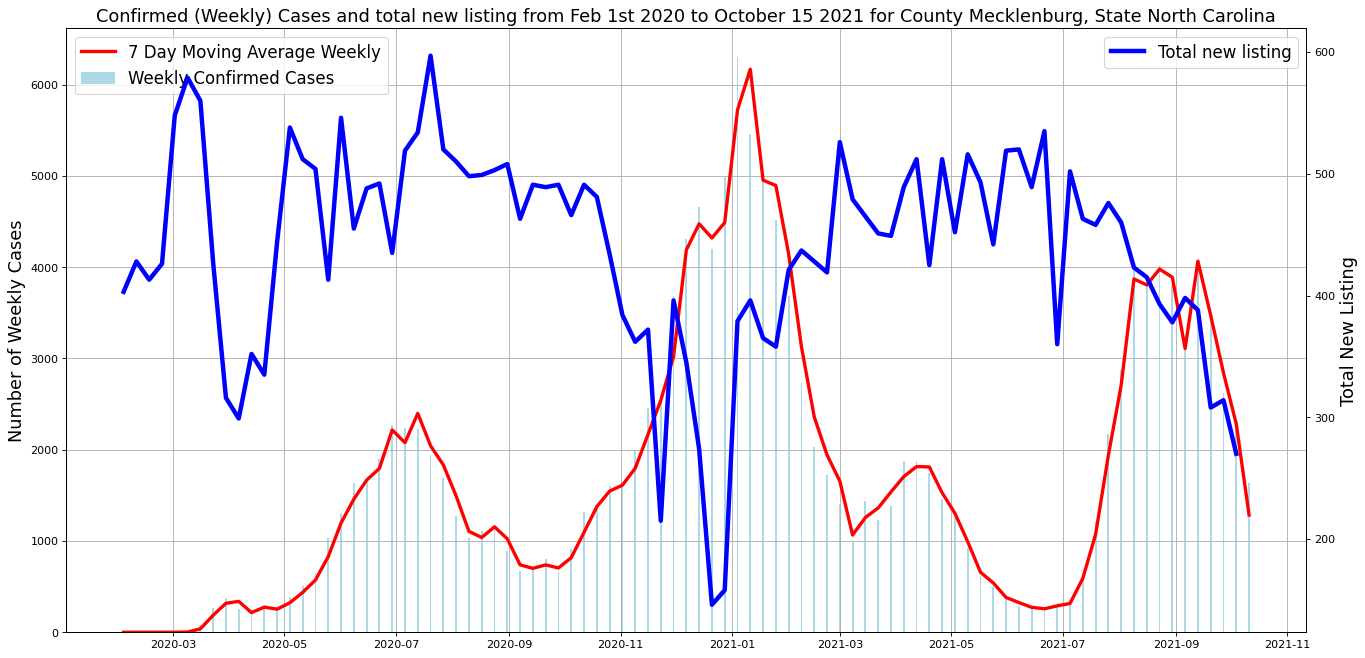

In [17]:
figure(figsize=(20, 10), dpi=80)
plt.grid(True)

ax = plt.gca()
ax2 = plt.twinx()

#Confirmed Cases
ax.bar(nc_housing_covid['period_begin'], nc_housing_covid['Cases'], color='lightblue', label='Weekly Confirmed Cases', width=1)

#7 day moving average
ax.plot(nc_housing_covid['period_begin'], nc_housing_covid['Moving Average Cases'], color='red', label='7 Day Moving Average Weekly', linewidth=3)

#homes sold
ax2.plot(nc_housing_covid['period_begin'], nc_housing_covid['total_new_listings'], color='blue', label='Total new listing', linewidth=4)

plt.xlabel('Date', fontsize=16)
plt.title('Confirmed (Weekly) Cases and total new listing from Feb 1st 2020 to October 15 2021 for County Mecklenburg, State North Carolina', fontsize=16)

ax.set_ylabel('Number of Weekly Cases', fontsize=16)
ax2.set_ylabel('Total New Listing', fontsize=16)

ax.legend(loc=2, fontsize=15)
ax2.legend(loc=1, fontsize=15)
plt.savefig('../results/weekly_cases_vs_new_listing_mecklenburg_county.jpeg')

### Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
monthly_raw = pd.read_csv(os.path.join(RAW_PATH,'county_market_tracker.tsv'), sep='\t')
monthly_raw.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2019-03-01,2019-03-31,30,county,5,1630,f,"Daviess County, MO",NaN,Missouri,...,0.000000,0.120000,0.072381,0.02,0.000000,-1.000000,-0.500000,Missouri nonmetropolitan area,NaN,2021-10-24 15:14:52
1,2018-08-01,2018-08-31,30,county,5,163,f,"Madison County, AL",NaN,Alabama,...,0.102424,NaN,NaN,NaN,0.044186,-0.003433,-0.006769,"Huntsville, AL",26620.0,2021-10-24 15:14:52
2,2015-04-01,2015-04-30,30,county,5,3218,f,"St. Croix County, WI",NaN,Wisconsin,...,0.000000,0.294118,-0.058824,NaN,1.000000,0.500000,0.333333,"Minneapolis, MN",33460.0,2021-10-24 15:14:52
3,2019-11-01,2019-11-30,30,county,5,2347,f,"Malheur County, OR",NaN,Oregon,...,0.158333,NaN,NaN,NaN,0.000000,-0.083333,-0.125000,"Ontario, OR",36620.0,2021-10-24 15:14:52
4,2013-07-01,2013-07-31,30,county,5,1464,f,"Kandiyohi County, MN",NaN,Minnesota,...,0.023006,NaN,NaN,NaN,0.055556,-0.021368,0.055556,"Willmar, MN",48820.0,2021-10-24 15:14:52


In [20]:
monthly_raw = monthly_raw[monthly_raw["region"].str.contains('Mecklenburg County, NC')]
monthly_raw

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
210,2019-05-01,2019-05-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,-0.083333,0.216495,0.041892,0.037687,0.352941,0.052941,0.117647,"Charlotte, NC",16740.0,2021-10-24 15:14:52
396,2017-09-01,2017-09-30,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,0.285714,0.152542,0.009685,-0.053340,0.363636,0.272727,0.113636,"Charlotte, NC",16740.0,2021-10-24 15:14:52
1078,2018-08-01,2018-08-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,-0.166667,0.184615,-0.024476,0.041758,0.357143,0.071429,0.266234,"Charlotte, NC",16740.0,2021-10-24 15:14:52
4924,2021-08-01,2021-08-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,0.246730,0.148984,0.017837,0.044636,0.425197,0.012952,0.044666,"Charlotte, NC",16740.0,2021-10-24 15:14:52
5636,2019-09-01,2019-09-30,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,-0.024017,0.253525,-0.021085,0.028617,0.176198,-0.040772,-0.008013,"Charlotte, NC",16740.0,2021-10-24 15:14:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524049,2015-12-01,2015-12-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,0.000000,0.023256,-0.158562,-0.101744,0.000000,0.000000,0.000000,"Charlotte, NC",16740.0,2021-10-24 15:14:52
524357,2017-07-01,2017-07-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,NaN,0.261905,0.032738,NaN,0.333333,0.083333,NaN,"Charlotte, NC",16740.0,2021-10-24 15:14:52
525172,2015-12-01,2015-12-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,-0.075758,0.053942,-0.026827,-0.027691,0.100000,0.028571,-0.030435,"Charlotte, NC",16740.0,2021-10-24 15:14:52
529030,2021-08-01,2021-08-31,30,county,5,2066,f,"Mecklenburg County, NC",NaN,North Carolina,...,0.218434,0.200780,0.009057,0.047679,0.395349,-0.007277,0.082405,"Charlotte, NC",16740.0,2021-10-24 15:14:52


In [21]:
monthly_raw = monthly_raw[['period_end','region','property_type','median_sale_price']]
monthly_raw['period_end'] = pd.to_datetime(monthly_raw['period_end'])

monthly_raw = monthly_raw.sort_values(["period_end"], ascending = (True))

monthly_raw = monthly_raw[monthly_raw['property_type'] == 'All Residential']

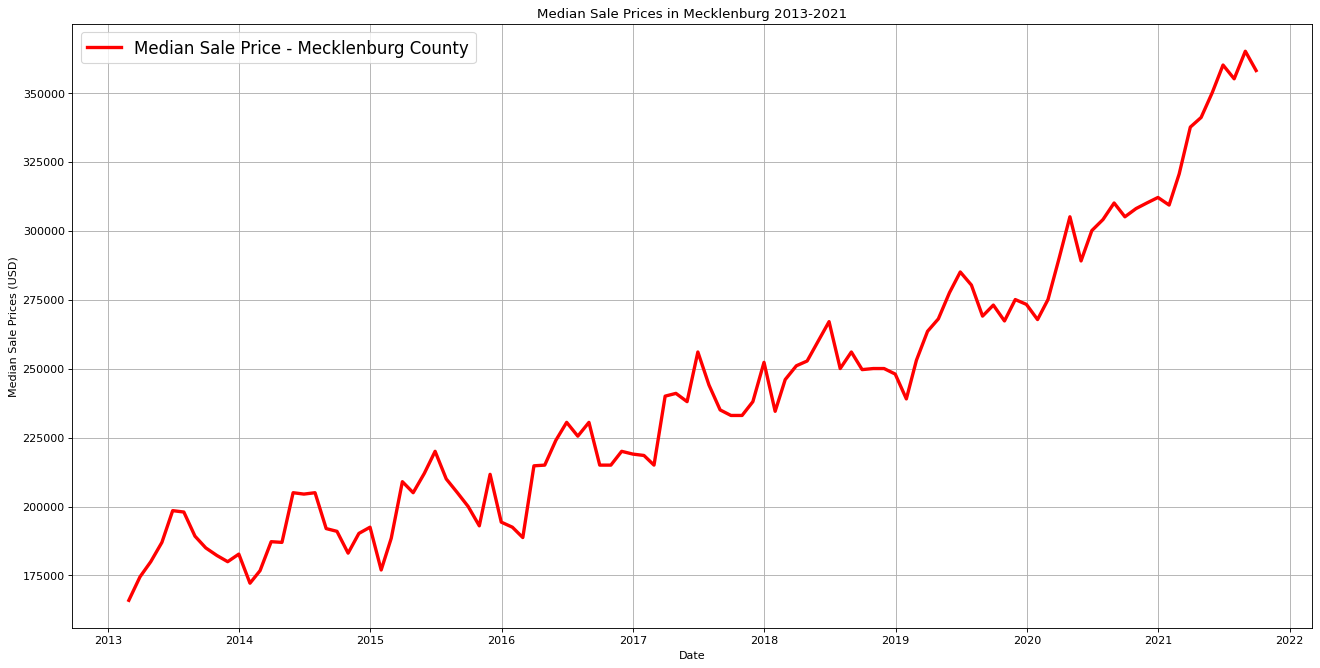

<Figure size 432x288 with 0 Axes>

In [22]:
#all residential

#plot diagram
figure(figsize=(20, 10), dpi=80)
plt.grid(True)

ax = plt.gca()
ax.plot(monthly_raw['period_end'], monthly_raw['median_sale_price'], color='red', label='Median Sale Price - Mecklenburg County', linewidth=3)

ax.set_xlabel('Date')
ax.set_ylabel('Median Sale Prices (USD)')
ax.set_title("Median Sale Prices in Mecklenburg 2013-2021")

ax.legend(loc=2, fontsize=15)
plt.show()
plt.savefig('../results/median_sale_prie_mecklenburg_county.jpeg')

In [23]:
monthly_raw['ordinal_date'] = monthly_raw['period_end'].map(dt.datetime.toordinal)

#train set 2013 - 2019
train_df = monthly_raw[monthly_raw['period_end'] < '2020-01-31']

#validation set
validation_df = monthly_raw[monthly_raw['period_end'] >= '2020-01-31']

#80-20 split
X = train_df.ordinal_date.values.reshape(-1,1)
y = train_df.median_sale_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression().fit(X_train, y_train)

print(f"Coefficient: {model.coef_}, Intercept: { model.intercept_}")
print(f'Model R2 Score: ', model.score(X_train, y_train))

Coefficient: [39.34953406], Intercept: -28746284.160691317
Model R2 Score:  0.8904875098386147


In [24]:
def convert_ordinal_to_date(data):
    x = data.reshape(1,-1)
    ret_dates = []
    array_size = x.shape[1]
    for i in range(array_size):
        ret_dates.append(dt.datetime.fromordinal(x[0][i]).strftime("%Y-%m-%d"))
    
    return ret_dates

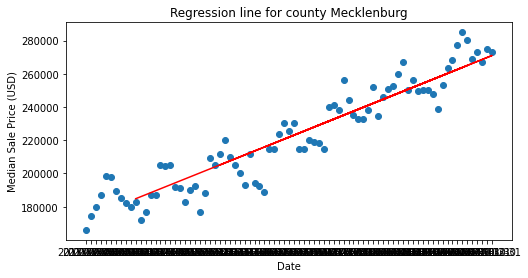

In [35]:
y_test_pred = model.predict(X_test)

fig2 = plt.figure(figsize=(8, 4))
ax = plt.axes()

ax.scatter(convert_ordinal_to_date(X), y)
ax.plot(convert_ordinal_to_date(X_test), y_test_pred, color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Median Sale Price (USD)')
ax.axis('tight')
ax.set_title(f"Regression line for county Mecklenburg")

plt.savefig('../results/linear_regression_line_median_sale_price.jpeg')

In [26]:
print(f"The Actual Vs Predicted House Prices on Test Data for county Mecklenburg")

ml_df_test_set = pd.DataFrame({'date':convert_ordinal_to_date(X_test),'test_set_actual_prices': y_test, 'test_set_predicted_prices':  y_test_pred})
ml_df_test_set.set_index('date',inplace=True)
print(ml_df_test_set)
print("\n\n\n")

The Actual Vs Predicted House Prices on Test Data for county Mecklenburg
            test_set_actual_prices  test_set_predicted_prices
date                                                         
2013-12-31                182750.0              184791.817939
2019-03-31                263500.0              260185.525206
2017-02-28                215000.0              230240.529783
2017-11-30                238000.0              241061.651651
2016-06-30                230500.0              220678.593005
2018-08-31                256000.0              251843.423984
2018-02-28                246000.0              244603.109716
2019-12-31                273250.0              271006.647073
2018-07-31                250000.0              250623.588428
2016-12-31                219000.0              227918.907273
2019-07-31                280250.0              264986.168362
2018-09-30                249615.0              253023.910006
2017-12-31                252250.0              242281.4872

In [27]:
#Print the MAE, MSE and RMSE values
print("MAE, MSE and RMSE on Test Data for Mecklenburg")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE, MSE and RMSE on Test Data for Mecklenburg
Mean Absolute Error: 9233.394318591585
Mean Squared Error: 148861163.57806388
Root Mean Squared Error: 12200.86732892641


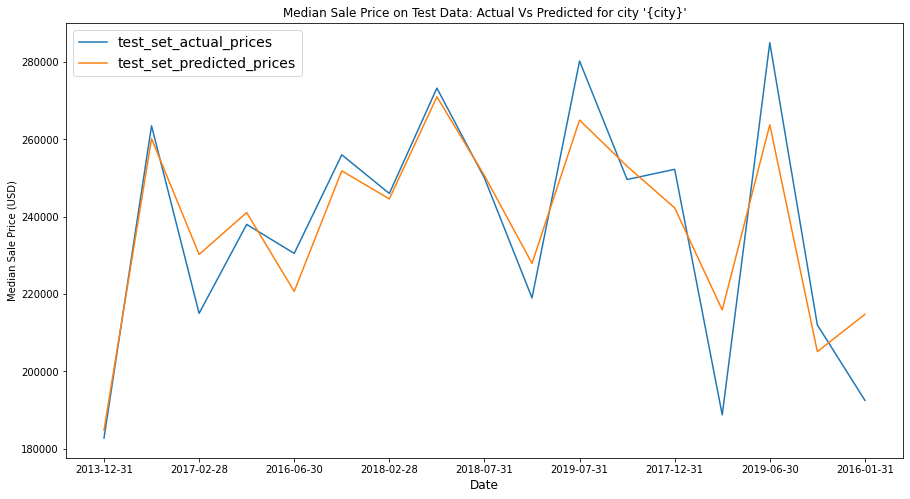

In [36]:
ax3 = ml_df_test_set.plot(figsize = (15,8))

plt.legend(bbox_to_anchor=(0.5,0.5), loc='upper left', ncol=1)

plt.xlabel("Date", fontsize = 12)
plt.ylabel("Median Sale Price (USD)")
plt.title("Median Sale Price on Test Data: Actual Vs Predicted for city '{city}'")  

plt.legend(loc=2, fontsize=14)

plt.savefig('../results/test_set_actual_vs_predicted_price.jpeg')

In [29]:
  # Verify Prediction with 2020 data

X_validation = validation_df.ordinal_date.values.reshape(-1,1)
y_validation_actual_prices =  validation_df.median_sale_price
y_validation_pred_prices = model.predict(X_validation)

ml_validation_df = pd.DataFrame({'date':convert_ordinal_to_date(X_validation),'actual_validation_house_prices': y_validation_actual_prices, 'predicted_validation_house_prices':  y_validation_pred_prices})
ml_validation_df.set_index('date',inplace=True)

print(f"The Actual Vs Predicted House Prices on 2020 data for Mecklenburg")
print(ml_validation_df)

The Actual Vs Predicted House Prices on 2020 data for Mecklenburg
            actual_validation_house_prices  predicted_validation_house_prices
date                                                                         
2020-01-31                        267750.0                      272226.482629
2020-02-29                        275000.0                      273367.619117
2020-03-31                        290000.0                      274587.454673
2020-04-30                        305000.0                      275767.940695
2020-05-31                        289000.0                      276987.776251
2020-06-30                        300000.0                      278168.262273
2020-07-31                        304000.0                      279388.097829
2020-08-31                        310000.0                      280607.933385
2020-09-30                        305000.0                      281788.419407
2020-10-31                        307975.0                      283008.25496

In [30]:
print(f"MAE, MSE and RMSE on 2020 Data for Mecklenburg")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation_actual_prices, y_validation_pred_prices))
print('Mean Squared Error:', metrics.mean_squared_error(y_validation_actual_prices, y_validation_pred_prices))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation_actual_prices, y_validation_pred_prices)))

MAE, MSE and RMSE on 2020 Data for Mecklenburg
Mean Absolute Error: 33965.30244354123
Mean Squared Error: 1559333415.38382
Root Mean Squared Error: 39488.39595860815


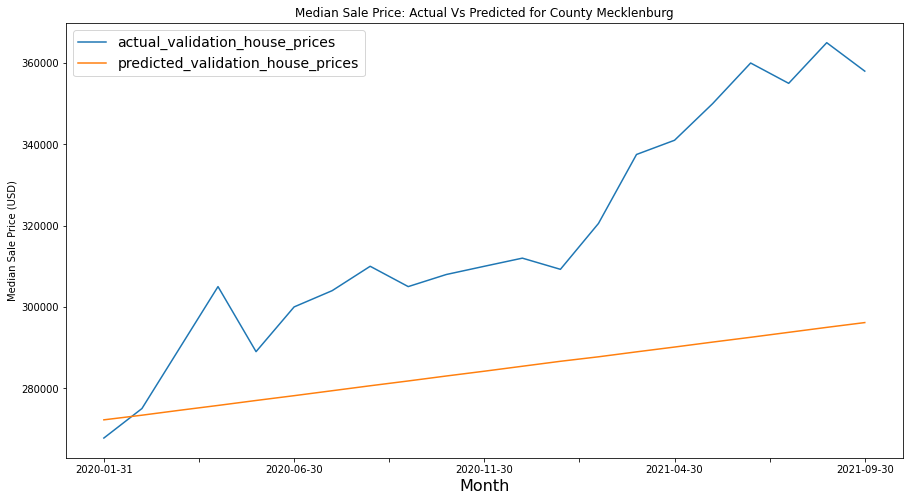

In [37]:
ax4 = ml_validation_df.plot(figsize = (15,8))

plt.legend(bbox_to_anchor=(0.5,0.5), loc='upper right', ncol=1)
plt.xlabel("Month", fontsize = 16)
plt.ylabel("Median Sale Price (USD)")
plt.title(f"Median Sale Price: Actual Vs Predicted for County Mecklenburg")     

plt.legend(loc=2, fontsize=14)
plt.savefig('../results/actual_vs_predicted_price_validation_set.jpeg')